# **Comparison of Streaming Platforms for TV-shows**

## We are going to attempt to answer the dilemma of which market leading streaming service to purchase a subscription from if you are an avid tv-show binger. 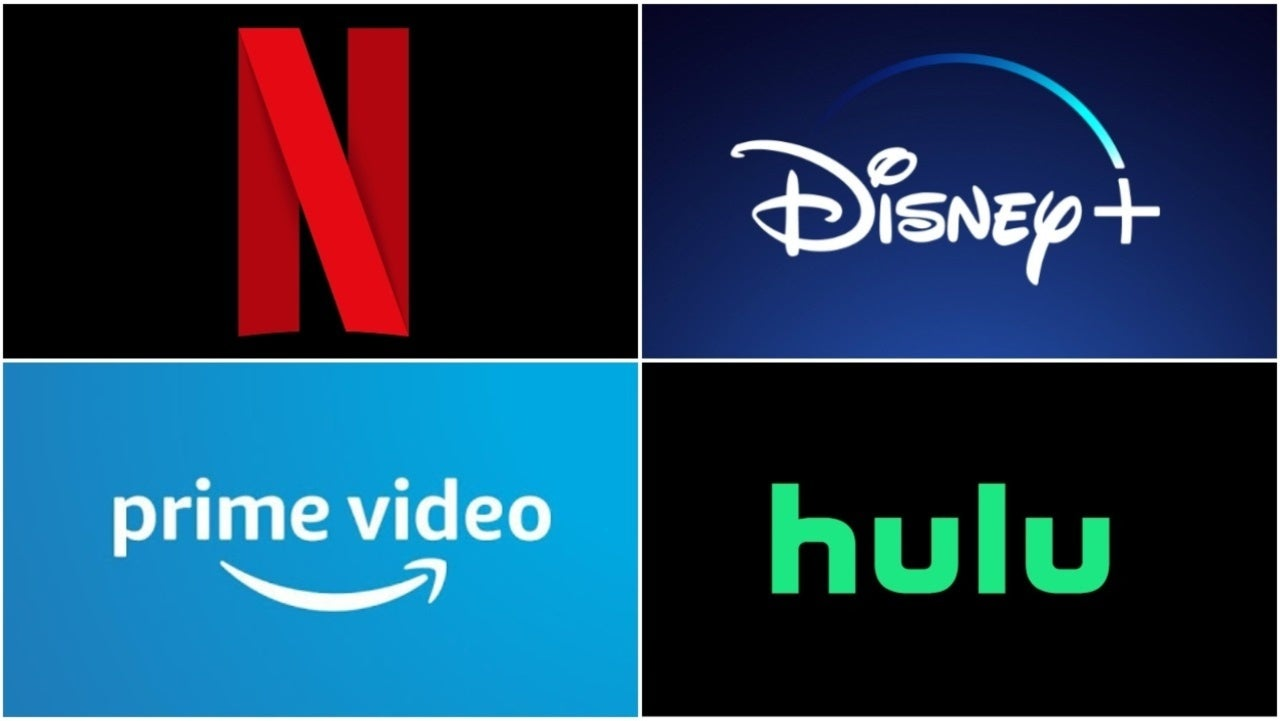

### Import the necessary modules needed for this analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

### Read the .csv file into a pandas dataframe

In [2]:
video_data = pd.read_csv('tv_shows_data.csv')

### Quick inspection of the dataframe

In [3]:
display(video_data.head())

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


### Removal of the unnecessary column 'type' from the dataframe

In [4]:
video_data = video_data.drop(['Unnamed: 0', 'type'], axis=1)

### Further inspection of the dataframe column types and NaN counts

In [5]:
display(video_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   Year             5611 non-null   int64  
 2   Age              3165 non-null   object 
 3   IMDb             4450 non-null   float64
 4   Rotten Tomatoes  1011 non-null   object 
 5   Netflix          5611 non-null   int64  
 6   Hulu             5611 non-null   int64  
 7   Prime Video      5611 non-null   int64  
 8   Disney+          5611 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 394.6+ KB


None

### All vital columns are filled, we are now going to ensure there are no duplicated tv-shows in the data

In [6]:
duplicates = video_data.duplicated(subset='Title', keep=False)
duplicated_values = video_data[duplicates].sort_values('Title')
display(duplicated_values.head(20))

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
3119,Abandoned,2012,NaN,NaN,NaN,0,1,0,0
2804,Abandoned,2016,16+,8.4,NaN,0,1,0,0
2580,American Gladiators,1989,7+,6.5,NaN,0,1,0,0
3044,American Gladiators,2008,NaN,5.6,NaN,0,1,0,0
3776,American Gothic,2016,16+,6.7,58%,0,0,1,0
2271,American Gothic,1995,7+,8.1,67%,0,1,0,0
2226,Baby Daddy,2012,16+,7.3,NaN,0,1,0,0
1370,Baby Daddy,2015,16+,6.0,78%,1,0,0,0
4397,Baby Talk,1991,all,4.2,NaN,0,0,1,0
5235,Baby Talk,2017,NaN,NaN,NaN,0,0,1,0


#### The duplicates are likely to be different shows sharing the same title, due to mostly different attributes (no identical year)

### Let us inspect the total distribution of tv-shows on the four platforms, who offers the greatest amount of tv-shows?

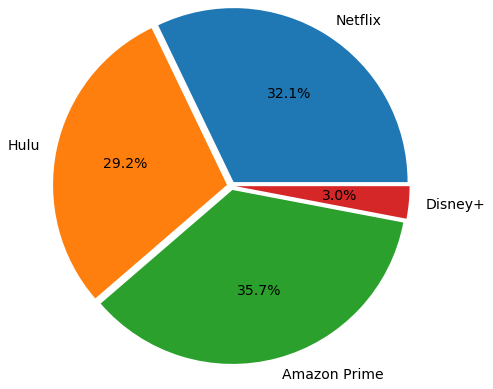

Netflix offers 1931 tv-shows
Hulu offers 1754 tv-shows
Prime offers 2144 tv-shows
Disney+ offers 180 tv-shows


In [7]:
netflix_sum = video_data['Netflix'].sum()
hulu_sum = video_data['Hulu'].sum()
prime_sum = video_data['Prime Video'].sum()
disney_sum = video_data['Disney+'].sum()

market_shares = [netflix_sum, hulu_sum, prime_sum, disney_sum]
labels = ('Netflix', 'Hulu', 'Amazon Prime', 'Disney+')
sep = (0.05, 0.05, 0.05, 0.05)

fig, ax = plt.subplots()

ax.pie(market_shares,
      explode=sep,
      labels = labels,
      autopct = '%.1f%%',
      radius=2,
     textprops={'fontsize': 14})

plt.show()

print('Netflix offers ' + str(netflix_sum) + ' tv-shows')
print('Hulu offers ' + str(hulu_sum) + ' tv-shows')
print('Prime offers ' + str(prime_sum) + ' tv-shows')
print('Disney+ offers ' + str(disney_sum) + ' tv-shows')

#### Prime offer the largest quantity of tv-shows, followed by Prime (who have just over 200 less), followed by Hulu and lastly Disney+ who have significantly less tv-shows than the competitors with only 180 shows on offer.

### We now know who offers the most tv-shows, but we must consider the quality of these tv-shows. Who offers the most highly rated tv-shows?

In [8]:
#Dataframes for each platform
netflix_shows = video_data.loc[video_data['Netflix'] == 1].drop(['Hulu', 'Prime Video', 'Disney+'], axis=1)
hulu_shows = video_data.loc[video_data['Hulu'] == 1].drop(['Netflix', 'Prime Video', 'Disney+'], axis=1)
prime_shows = video_data.loc[video_data['Prime Video'] == 1].drop(['Hulu', 'Netflix', 'Disney+'], axis=1)
disney_shows = video_data.loc[video_data['Disney+'] == 1].drop(['Hulu', 'Prime Video', 'Netflix'], axis=1)


In [9]:
#Who is the platform with the most highly rated shows?
top_netflix_shows = netflix_shows['IMDb'] > 8
top_hulu_shows = hulu_shows['IMDb'] > 8 
top_prime_shows = prime_shows['IMDb'] > 8
top_disney_shows = disney_shows['IMDb'] > 8

top_rated_shows = pd.DataFrame({
    'Platforms' : ['Netflix', 
                   'Hulu', 
                   'Prime Video', 
                   'Disney'],
    'Total highly rated shows' : [top_netflix_shows.sum(),
                                  top_hulu_shows.sum(),
                                  top_prime_shows.sum(),
                                  top_disney_shows.sum()]})

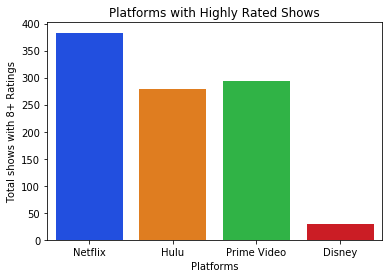

,Total highly rated shows
Platforms,
Netflix,383
Hulu,279
Prime Video,293
Disney,30


In [10]:
sns.barplot(x = top_rated_shows['Platforms'],
            y = top_rated_shows['Total highly rated shows'],
            data = top_rated_shows,
           palette = 'bright')

plt.xlabel('Platforms')
plt.ylabel('Total shows with 8+ Ratings')
plt.title('Platforms with Highly Rated Shows')
plt.show()

top_rated_shows = top_rated_shows.set_index('Platforms')
display(top_rated_shows)

#### Netflix reign supreme in the sense of having access to the most highly rated tv-shows, followed by Prime and Hulu who are nearly equal, and to no surprise Disney have significantly the least number of highly rated tv-shows.

### Although this information is useful in deciding who to subscribe to, another good question to ask is who is most consistent with quality when it comes to the provision of their tv-shows?

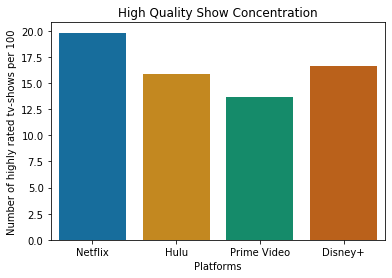

Netflix provides on average 20 high quality tv-shows out of every 100 tv-shoows
Hulu provides on average 16 high quality tv-shows out of every 100 tv-shoows
Prime Video provides on average 14 high quality tv-shows out of every 100 tv-shoows
Disney+ provides on average 17 high quality tv-shows out of every 100 tv-shoows


In [11]:
#Who is the platform with the best concentration of highly rated shows? 

ratio_netflix = (top_netflix_shows.sum() / netflix_sum * 100)
ratio_hulu = (top_hulu_shows.sum() / hulu_sum * 100)
ratio_prime = (top_prime_shows.sum() / prime_sum * 100)
ratio_disney = (top_disney_shows.sum() / disney_sum * 100)

top_rated_ratios = ({
    'platforms' : ['Netflix',
                   'Hulu',
                   'Prime Video',
                  'Disney+'],
    'ratios' : [ratio_netflix,
               ratio_hulu,
               ratio_prime,
               ratio_disney]
})

sns.barplot(x = top_rated_ratios['platforms'],
           y = top_rated_ratios['ratios'],
           palette = 'colorblind')

plt.xlabel('Platforms')
plt.ylabel('Number of highly rated tv-shows per 100')
plt.title('High Quality Show Concentration')

plt.show()

print('Netflix provides on average ' + str(int(round(ratio_netflix))) + ' high quality tv-shows out of every 100 tv-shoows')
print('Hulu provides on average ' + str(int(round(ratio_hulu))) + ' high quality tv-shows out of every 100 tv-shoows')
print('Prime Video provides on average ' + str(int(round(ratio_prime))) + ' high quality tv-shows out of every 100 tv-shoows')
print('Disney+ provides on average ' + str(int(round(ratio_disney))) + ' high quality tv-shows out of every 100 tv-shoows')

#### Although Disney+ fail to rival their competitor's quantity of tv-show output, they do have the second highest concentration of highly rated tv-shows.

### We cannot assume there is one definitive answer of who to subscribe to for every individual, we must understand which exact tv-shows are offered by each platform to allow consumers to gauge which tv-shows they are interested in watching in the near future, hence we are going to ask an important question. What are the highest rated tv-shows offered by each platform?

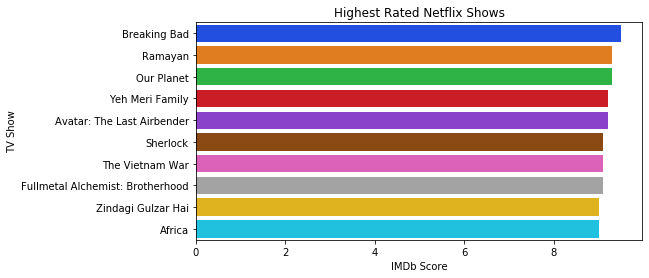

In [12]:
#Best tv-shows on offer for each streaming platform according to IMDb

netflix_top_10 = netflix_shows.sort_values(by='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=netflix_top_10, palette='bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Netflix Shows')

plt.show()

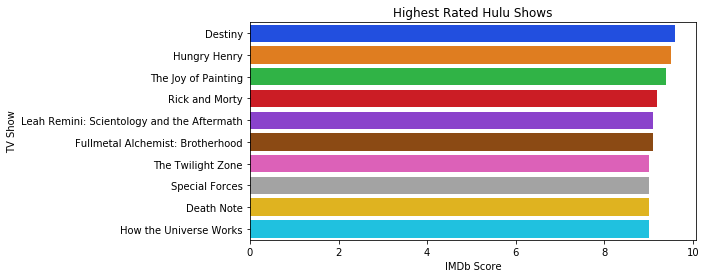

In [13]:
hulu_top_10 = hulu_shows.sort_values(by='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=hulu_top_10, palette='bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Hulu Shows')

plt.show()

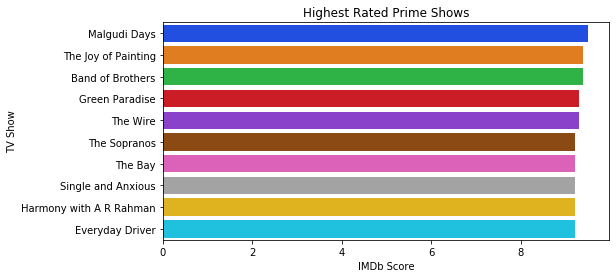

In [14]:
prime_top_10 = prime_shows.sort_values(by='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=prime_top_10, palette='bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Prime Shows')

plt.show()

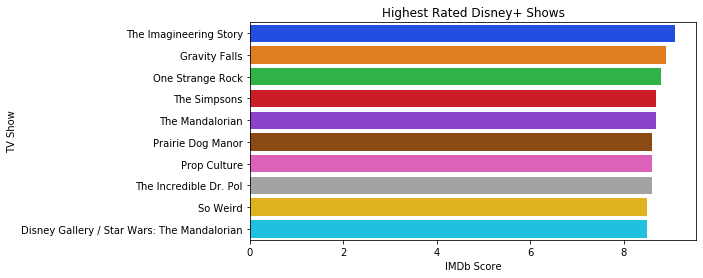

In [15]:
disney_top_10 = disney_shows.sort_values(by='IMDb', ascending = False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x='IMDb', y='Title', data=disney_top_10, palette='bright')

plt.xlabel('IMDb Score')
plt.ylabel('TV Show')
plt.title('Highest Rated Disney+ Shows')

plt.show()

#### On inspection, consumers can form opinions on who to subscribe to based on which shows they are meaning to watch.

### Who owns the current highest rated tv-shows across the 4 streaming platforms?

<Figure size 576x576 with 0 Axes>

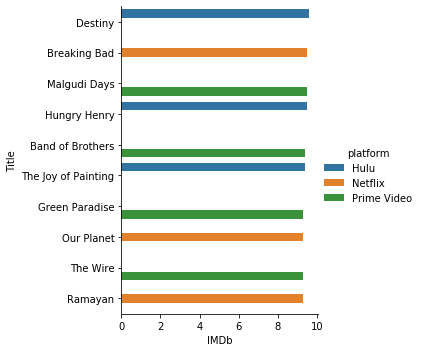

In [16]:
#Who has access to the top 10 tv-shows currently?

video_data['platform'] = video_data[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].idxmax(axis=1)

overall_top_10 = video_data.sort_values(by='IMDb', ascending=False).head(10)

plt.figure(figsize=(8,8))
sns.catplot(x='IMDb', y='Title', data=overall_top_10,hue='platform', kind='bar')
plt.show()

#### Hulu have access to 'Destiny' which is the highest rated show available across the platforms, however Prime Video have access to 4/10 of the highest rated shows, suggesting they are the optimal choice. 

### Which services are best suited for children?

In [19]:
#Which age grouping exist?
print(video_data.Age.unique())

['18+' '16+' '7+' nan 'all' '13+']


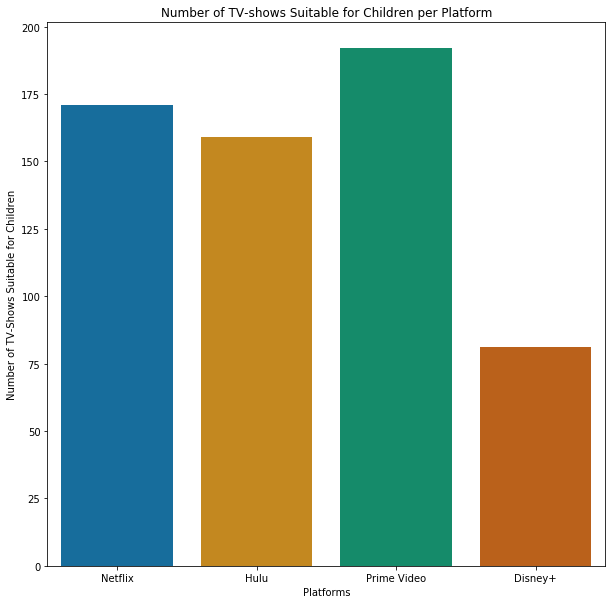

Netflix has 171 tv-shows for children
Hulu has 159 tv-shows for children
Prime has 192 tv-shows for children
Disney+ has 81 tv-shows for children


In [32]:
#'all' signifies they are suitable for children, which platforms are best subscribed to for children entertainment?

net_child = netflix_shows[netflix_shows['Age'] == 'all']
hulu_child = hulu_shows[hulu_shows['Age'] == 'all']
prime_child = prime_shows[prime_shows['Age'] == 'all']
disney_child = disney_shows[disney_shows['Age'] == 'all']

net1 = len(net_child['Title'])
hulu1 = len(hulu_child['Title'])
prime1 = len(prime_child['Title'])
disney1 = len(disney_child['Title'])

children_sum = ({
    'platforms' : ['Netflix',
                   'Hulu',
                   'Prime Video',
                  'Disney+'],
    'sums' : [net1,
               hulu1,
               prime1,
               disney1]
})
plt.figure(figsize=(10,10))
sns.barplot(x = children_sum['platforms'],
           y = children_sum['sums'],
           palette = 'colorblind')

plt.xlabel('Platforms')
plt.ylabel('Number of TV-Shows Suitable for Children')
plt.title('Number of TV-shows Suitable for Children per Platform')

plt.show()

print('Netflix has ' + str(net1) + ' tv-shows for children')
print('Hulu has ' + str(hulu1) + ' tv-shows for children')
print('Prime has ' + str(prime1) + ' tv-shows for children')
print('Disney+ has ' + str(disney1) + ' tv-shows for children')

#### Prime has the most tv-shows suitable for children, but what about concentration of tv-shows for children, as the platform with the highest concentration is likely to be much more tailored towards children and have tv-shows that are made specifically for children

### Which platform has the highest concentration of tv-shows for children?

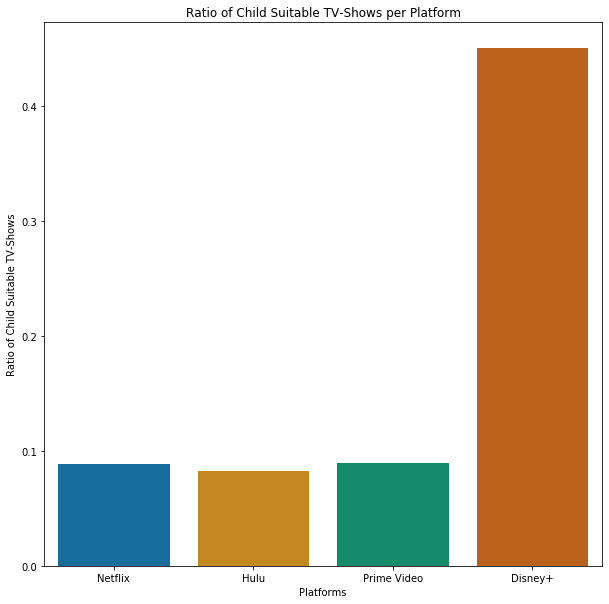

0.45


In [35]:
ratio1_netflix = net1 / netflix_sum
ratio1_hulu = hulu1 / netflix_sum
ratio1_prime = prime1 / prime_sum
ratio1_disney = disney1 / disney_sum

children_show_ratios = ({
    'platforms' : ['Netflix',
                   'Hulu',
                   'Prime Video',
                  'Disney+'],
    'ratios' : [ratio1_netflix,
               ratio1_hulu,
               ratio1_prime,
               ratio1_disney]
})

plt.figure(figsize=(10,10))
sns.barplot(x = children_show_ratios['platforms'],
           y = children_show_ratios['ratios'],
           palette = 'colorblind')

plt.xlabel('Platforms')
plt.ylabel('Ratio of Child Suitable TV-Shows')
plt.title('Ratio of Child Suitable TV-Shows per Platform')

plt.show()

print(ratio1_disney)

#### Evidently Disney+ is much more child-friendly than the 3 alternatives, with a 4-fold greater difference in the ratio of child-friendly tv-shows on Disney+ in comparison.

## Conclusion: Although Prime offer the largest number of tv-shows, if you prioritise quality over quantity then Netflix is the optimal choice with the most and highly concentrated number of highly rated TV shows. On the other hand, if you are satisfying the needs of your children then Disney+ is a tremendous subscription as it is heavily tailored towards children.